In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import string

import os
import math
import time
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

#for storing the model
import pickle

# Below libraries are for text processing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load the data

In [5]:
news_articles_og = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/news_articles_with_sentiment_analysis.pkl')

In [ ]:
news_articles_og.head()

,short_description,link,headlines,category,topic,article_text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Uorfi Javed criticised Sonali Kulkarni for her...,https://www.freepressjournal.in/amp/entertainm...,How insensitive: Uorfi on Sonali's 'many girls...,ENTERTAINMENT,3,Bigg Boss OTT fame Urfi Javed lashed out at po...,0.569923,0.122619,Positive
1,Shakti Arora spoke about quitting the show 'Ku...,https://www.hindustantimes.com/entertainment/t...,Didn't want to play father to 28-yr-old: Shakt...,ENTERTAINMENT,5,Actor Shakti Arora has confirmed that his jour...,0.455716,0.143154,Positive
2,"'Naatu Naatu' singer Kaala Bhairava, who misse...",https://twitter.com/kaalabhairava7/status/1636...,Singer Kaala Bhairava apologises for not thank...,ENTERTAINMENT,2,JavaScript is not available.\n\nWe’ve detected...,0.225000,-0.150000,Negative
3,The makers of Ishaan Khatter and Mrunal Thakur...,https://indianexpress.com/article/entertainmen...,Makers of 'Pippa' refute reports of film's dir...,ENTERTAINMENT,6,News Entertainment Bollywood Ishaan Khatter's ...,0.503175,0.101587,Positive
4,"Guneet Monga, the producer of Oscar-winning do...",https://www.news18.com/amp/movies/guneet-monga...,India's moment taken away: Guneet Monga on not...,ENTERTAINMENT,5,Producer Guneet Monga finally reacted to not b...,0.474411,0.259848,Positive


# Text Preprocessing

## Performing text preprocessing

In [ ]:
# Function for data preprocessing

def clean_text(text):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      tokens_cleaned = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
      cleaned_text=" ".join(tokens_cleaned)
      return cleaned_text


In [ ]:
# Performing data preprocessing
# create a copy od dataset
news_articles = news_articles_og

# Remove duplicates and reset index
news_articles.drop_duplicates(inplace = True)
news_articles = news_articles.reset_index()


news_articles['cleaned_text'] = news_articles_og['short_description'].apply(clean_text)
news_articles['clean_headlines'] = news_articles_og['headlines'].apply(clean_text)

# Performing label encoding on categorical columns

news_articles[['TextBlob_Analysis','category']] = news_articles[['TextBlob_Analysis','category']].apply(LabelEncoder().fit_transform)


In [ ]:
news_articles.head()

,index,short_description,link,headlines,category,topic,article_text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,cleaned_text,clean_headlines
0,0,Uorfi Javed criticised Sonali Kulkarni for her...,https://www.freepressjournal.in/amp/entertainm...,How insensitive: Uorfi on Sonali's 'many girls...,2,3,Bigg Boss OTT fame Urfi Javed lashed out at po...,0.569923,0.122619,2,Uorfi Javed criticised Sonali Kulkarni recent ...,insensitive Uorfi Sonali many girl lazy remark
1,1,Shakti Arora spoke about quitting the show 'Ku...,https://www.hindustantimes.com/entertainment/t...,Didn't want to play father to 28-yr-old: Shakt...,2,5,Actor Shakti Arora has confirmed that his jour...,0.455716,0.143154,2,Shakti Arora spoke quitting show Kundali Bhagy...,want play father 28yrold Shakti quitting show
2,2,"'Naatu Naatu' singer Kaala Bhairava, who misse...",https://twitter.com/kaalabhairava7/status/1636...,Singer Kaala Bhairava apologises for not thank...,2,2,JavaScript is not available.\n\nWe’ve detected...,0.225000,-0.150000,0,Naatu Naatu singer Kaala Bhairava missed ackno...,Singer Kaala Bhairava apologises thanking Char...
3,3,The makers of Ishaan Khatter and Mrunal Thakur...,https://indianexpress.com/article/entertainmen...,Makers of 'Pippa' refute reports of film's dir...,2,6,News Entertainment Bollywood Ishaan Khatter's ...,0.503175,0.101587,2,maker Ishaan Khatter Mrunal Thakurstarrer Pipp...,Makers Pippa refute report film direct release
4,4,"Guneet Monga, the producer of Oscar-winning do...",https://www.news18.com/amp/movies/guneet-monga...,India's moment taken away: Guneet Monga on not...,2,5,Producer Guneet Monga finally reacted to not b...,0.474411,0.259848,2,Guneet Monga producer Oscarwinning documentary...,India moment taken away Guneet Monga allowed s...


## Store preprocessed data with all columns as pickle file

In [ ]:
# news_articles.to_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/dataset_preprocessed.pkl')

## Load preprocessed data form pickle file

In [ ]:
news_articles = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/dataset_preprocessed.pkl')

# Creating features for model

### Using TF-IDF method

In [ ]:
tfidf_short_text_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_short_text_features = tfidf_short_text_vectorizer.fit_transform(news_articles['cleaned_text'])

In [ ]:
# Creating dataframe with all columns in numerical form

col = ['TextBlob_Subjectivity', 'TextBlob_Polarity','TextBlob_Analysis','topic','category'] 
tfidf_short_text = pd.DataFrame(tfidf_short_text_features.todense())
news_articles_with_features = pd.concat([tfidf_short_text, news_articles[col]], axis=1)
news_articles_with_features.head()

,0,1,2,3,4,5,6,7,8,9,...,6934,6935,6936,6937,6938,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,topic,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.569923,0.122619,2,3,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.455716,0.143154,2,5,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.225000,-0.150000,0,2,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.503175,0.101587,2,6,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.474411,0.259848,2,5,2


### Saving the features

In [ ]:
# # string the pre-processed dataset as a pickle file
# news_articles_with_features.to_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/dataset_features.pkl')

### Load the saved data

In [ ]:
news_articles_with_features = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/dataset_features.pkl')

# Run these cells

## Loading the data and features

In [ ]:
news_articles_og = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/news_articles_with_sentiment_analysis.pkl')

In [ ]:
news_articles_pca_features = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/news_articles_pca_features.pkl')

In [ ]:
news_articles = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/dataset_preprocessed.pkl')

In [ ]:
news_articles_with_features = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/Pickle Files/dataset_features.pkl')

## Defining functions

In [ ]:
# Specifying columns for different operations

col = ['TextBlob_Subjectivity', 'TextBlob_Polarity','TextBlob_Analysis','topic'] 
cols = [i for i in range(520)]
cols.append('category')

cs_given = cosine_similarity(news_articles_with_features[cols])
cs = cosine_similarity(news_articles_with_features[col])

In [ ]:
# Function to recommend initially

def tfidf_based_model(row_index, num_similar_items,cs_given):
    couple_dist = cs_given[row_index]
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    return indices
# ind = tfidf_based_model(67, 200,cs_given)
# ind

In [ ]:
 # Function to calculate ILD

def ILD(li,cs):
  sum = 0
  n = len(li)
  
  for i in range(len(li)):
    for j in range(i):
      if(i!=j):
        sum += cs[li[i]][li[j]]

  ILD = sum/(n*(n-1))
  return (1-ILD)

In [ ]:
# defining cosine similarity of one vs all 

def cosine_similarity_ova (one, all,cs):
  sum = 0
  n = len(all)
  cs_list = cs[one][all]
  for item in cs_list:
    sum += item
  c = sum/n
  return c

In [ ]:
# recommended list is the indices of top 50 of similarity based result of an item.

def diversify(recommended_list, thresh,cs):

  # initializing the diversified list
  diversified_list = []
  diversified_list.append(recommended_list[0])

  # initialising candidate_list 
  candidate_list = recommended_list

  # loop from 2 to n in candidate_list
  for i in range(1,len(candidate_list)):
    candidate_item = candidate_list[i]

    # set of items in candidate_list that didnot occur in diversifeid list so far(i.e in diversified_list[:i])
    candidate_temp = [article for article in candidate_list if article not in diversified_list[:i]]

    diversity_values = []
    #compute diversity metric of each ele in candidate temp wrt all items in diversified list
    for ele in candidate_temp:
      t = (1-cosine_similarity_ova(ele,diversified_list,cs),ele)
      diversity_values.append(t)

    #sort the diversity score in reverse
    diversity_values.sort(reverse=True)

    list1={}
    for i in range(len(diversity_values)):
      list1[diversity_values[i][1]] = i

    # calculate weights 
    weights = []
    for i in range(len(candidate_temp)):
      pos_og = recommended_list.index(candidate_temp[i])
      pos_div = list1[candidate_temp[i]]
      w = ( (pos_og*(1-thresh)) + (pos_div)*thresh, candidate_temp[i] )
      weights.append(w)

    weights.sort()

    if (len(weights) != 0):
      diversified_list.append(weights[0][1])

  return diversified_list

# Results

In [ ]:
# Generating initial recommendation lists 

recommended_list = tfidf_based_model(213,200,cs_given).tolist()
recommended_list2 = tfidf_based_model(221,200,cs_given).tolist()
recommended_list[:10]

[194, 315, 557, 313, 750, 751, 119, 316, 120, 122]

In [ ]:
# creating diversified list for range of threshold values

test_list = []
test_list2 = []
for i in range(1,100,5):
  thresh = i*0.01
  test_list.append(diversify(recommended_list,thresh,cs))
  test_list2.append(diversify(recommended_list2,thresh,cs))

In [ ]:
# Creating list of diversity scores for each list 

div_scores_list = []
div_scores_list2 = []
scores_list = []
scores_list2 = []
for list in test_list:
  scores_list.append(ILD(list[:10],cs))

for list in test_list2:
  scores_list2.append(ILD(list[:10],cs))

diversity_factor_list = [i*0.01 for i in range(1,100,5)]
len(diversity_factor_list)

20

## Diversity score vs Diversity Factor graph

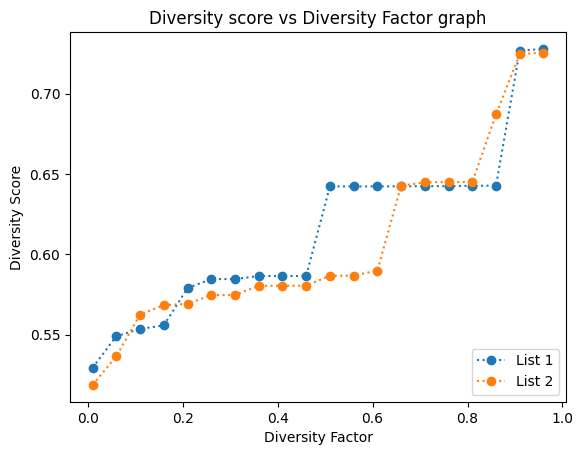

In [ ]:
# Plotting the performance

xpoints = np.array(diversity_factor_list)
ypoints = np.array(scores_list)
ypoints2 = np.array(scores_list2)

x = 0
y = ILD(recommended_list[:10],cs)

plt.plot(xpoints, ypoints, marker = 'o',linestyle = 'dotted')
plt.plot(xpoints, ypoints2, marker = 'o',linestyle = 'dotted')
# plt.plot(x, y, marker = 'o',linestyle = 'dotted')

plt.legend(["List 1", "List 2"], loc ="lower right")

plt.xlabel("Diversity Factor")
plt.ylabel("Diversity Score")
plt.title('Diversity score vs Diversity Factor graph')
plt.show()

## Impact of diversification on distribution of categories

Text(0.5, 0.98, 'Impact of diversification on distribution of categories')

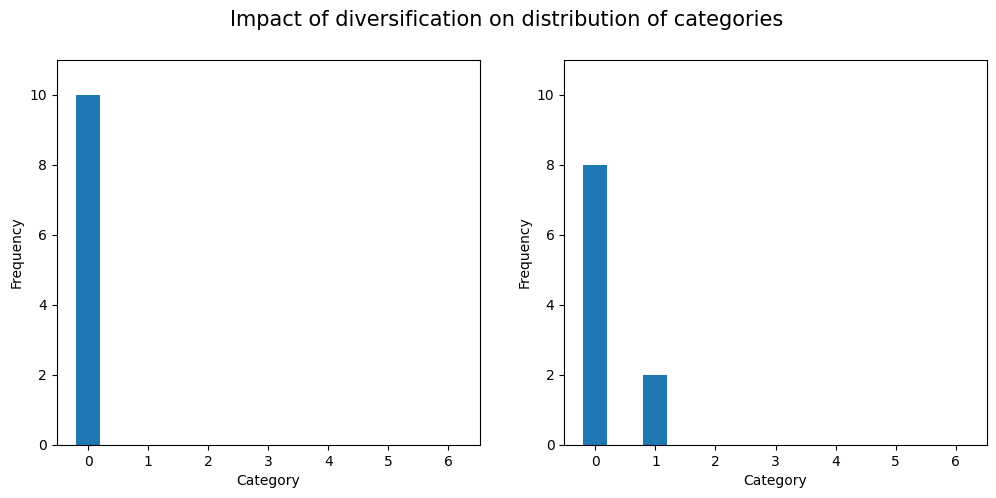

In [ ]:
# Plotting the performance

categories_list_og_names = news_articles_og.iloc[recommended_list2[:10]]['category']
categories_list_og = news_articles_with_features.iloc[recommended_list2[:10]]['category']
categories_list_og = [int(i) for i in categories_list_og]
categories_list_diverse = news_articles_with_features.iloc[test_list2[18][:10]]['category']
categories_list_diverse_names = news_articles_og.iloc[test_list2[18][:10]]['category']
categories_list_diverse = [int(i) for i in categories_list_diverse]

plt.figure(figsize=(12,5))


x = [0,1,2,3,4,5,6]
count_list = [categories_list_og.count(i) for i in x]
plt.subplot(1, 2, 1)
plt.ylim(0, 11)
plt.bar(x, count_list, width = 0.4)
plt.xlabel("Category")
plt.ylabel("Frequency")

count_list2 = [categories_list_diverse.count(i) for i in x]
plt.subplot(1, 2, 2)
plt.ylim(0, 11)
plt.bar(x, count_list2, width = 0.4)
plt.xlabel("Category")
plt.ylabel("Frequency")

plt.suptitle("Impact of diversification on distribution of categories", fontsize=15)

## Impact of diversification on distribution of Topics

Text(0.5, 0.98, 'Impact of diversification on distribution of Topics')

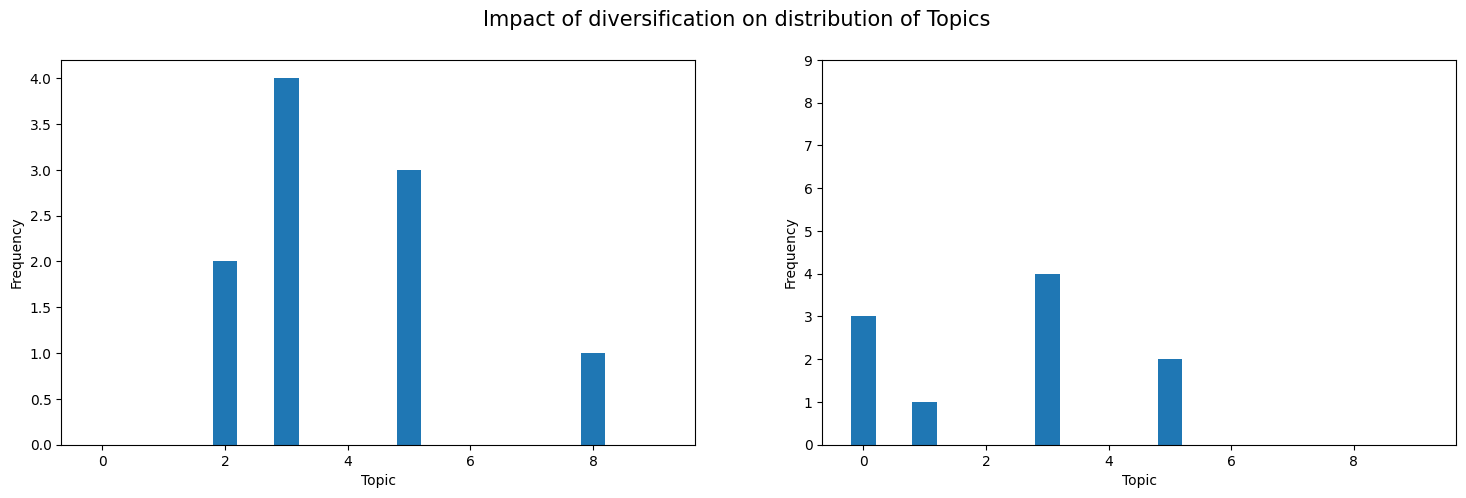

In [ ]:
# Plotting the performance

topic_list_og = news_articles_with_features.iloc[recommended_list[:10]]['topic']
topic_list_og = [int(i) for i in topic_list_og]
topic_list_diverse = news_articles_with_features.iloc[test_list2[18][:10]]['topic']
topic_list_diverse = [int(i) for i in topic_list_diverse]

plt.figure(figsize=(18,5))

x = news_articles_with_features['topic'].unique().tolist()
count_list = [topic_list_og.count(i) for i in x]
plt.subplot(1, 2, 1)
plt.bar(x, count_list, width = 0.4)
plt.xlabel("Topic")
plt.ylabel("Frequency")

count_list2 = [topic_list_diverse.count(i) for i in x]
plt.subplot(1, 2, 2)
plt.ylim(0, 10)
plt.ylim(min(x),max(x))
plt.bar(x, count_list2, width = 0.4)
plt.xlabel("Topic")
plt.ylabel("Frequency")

plt.suptitle("Impact of diversification on distribution of Topics", fontsize=15)

## Impact of diversification on distribution of subjectivity values

Text(0.5, 1.0, 'Impact of diversification on distribution of subjectivity values')

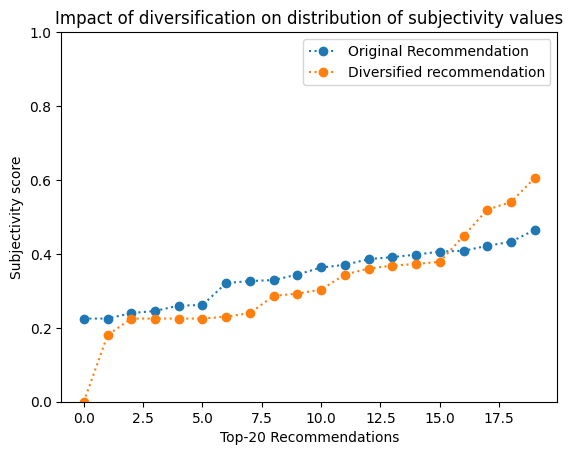

In [ ]:
# Plotting the performance

subjectivity_list_og = news_articles_with_features.iloc[recommended_list[:20]]['TextBlob_Subjectivity']
subjectivity_list_diverse = news_articles_with_features.iloc[test_list2[12][:20]]['TextBlob_Subjectivity']

x = [i for i in range(20)]
plt.ylim(0,1)
plt.plot(x, subjectivity_list_og.sort_values(), marker = 'o',linestyle = 'dotted')
plt.plot(x, subjectivity_list_diverse.sort_values(), marker = 'o',linestyle = 'dotted')
plt.xlabel("Top-20 Recommendations")
plt.ylabel("Subjectivity score")


plt.legend(["Original Recommendation", "Diversified recommendation"], loc ="upper right")
plt.title('Impact of diversification on distribution of subjectivity values')

## Impact of diversification on distribution of polarity values

Text(0.5, 1.0, 'Impact of diversification on distribution of polarity values')

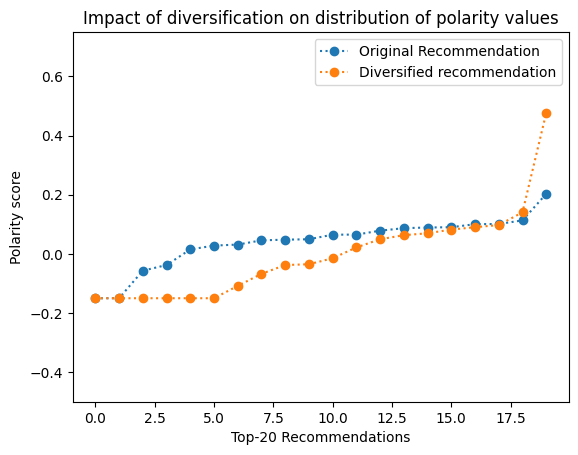

In [ ]:
# Plotting the performance

polarity_list_og = news_articles_with_features.iloc[recommended_list[:20]]['TextBlob_Polarity']
polarity_list_diverse = news_articles_with_features.iloc[test_list2[15][:20]]['TextBlob_Polarity']

x = [i for i in range(20)]
plt.ylim(-0.5,0.75)
plt.plot(x, polarity_list_og.sort_values(), marker = 'o',linestyle = 'dotted')
plt.plot(x, polarity_list_diverse.sort_values(), marker = 'o',linestyle = 'dotted')
plt.xlabel("Top-20 Recommendations")
plt.ylabel("Polarity score")

plt.legend(["Original Recommendation", "Diversified recommendation"], loc ="upper right")
plt.title('Impact of diversification on distribution of polarity values')